In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("ANZ.AX.csv",sep=",")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-19,28.450001,28.719999,28.410000,28.670000,27.796247,4496837
1,2019-06-20,28.870001,28.950001,28.610001,28.879999,27.999846,7971328
2,2019-06-21,28.799999,28.850000,28.410000,28.540001,27.670210,8435965
3,2019-06-24,28.520000,28.719999,28.420000,28.680000,27.805943,2594749
4,2019-06-25,28.540001,28.690001,28.360001,28.450001,27.582952,5151976


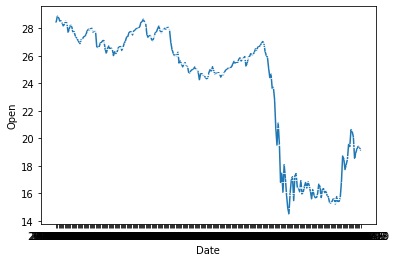

In [4]:
#view the line graph to see the change
sns.lineplot(x="Date",y="Open",data=data,marker=True)

In [5]:
#As we can see that ANZ from 19-06-2019 to 19-06-2020 has a big drop down due to Corona Virus
#Let's split the data into 2 years and analyze them
date = data["Date"].str.split("-")
date

0      [2019, 06, 19]
1      [2019, 06, 20]
2      [2019, 06, 21]
3      [2019, 06, 24]
4      [2019, 06, 25]
            ...      
251    [2020, 06, 15]
252    [2020, 06, 16]
253    [2020, 06, 17]
254    [2020, 06, 18]
255    [2020, 06, 19]
Name: Date, Length: 256, dtype: object

In [6]:
data["Year"] = date.str.get(0)

In [7]:
data["Date"] = date.str.get(2) + "-" + date.str.get(1)

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,19-06,28.450001,28.719999,28.410000,28.670000,27.796247,4496837,2019
1,20-06,28.870001,28.950001,28.610001,28.879999,27.999846,7971328,2019
2,21-06,28.799999,28.850000,28.410000,28.540001,27.670210,8435965,2019
3,24-06,28.520000,28.719999,28.420000,28.680000,27.805943,2594749,2019
4,25-06,28.540001,28.690001,28.360001,28.450001,27.582952,5151976,2019


In [116]:
year_2019 = data.loc[(data["Year"] == "2019")]
year_2019.to_csv("2019_dataset")

In [44]:
year_2020 = data.loc[(data["Year"] == "2020")]
year_2020.to_csv("2020_dataset")

In [11]:
year_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
138,02-01,24.440001,24.600000,24.420000,24.549999,24.549999,2804051,2020
139,03-01,24.709999,24.940001,24.690001,24.730000,24.730000,3403316,2020
140,06-01,24.600000,24.690001,24.410000,24.629999,24.629999,3567678,2020
141,07-01,24.799999,25.030001,24.770000,24.950001,24.950001,4023426,2020
142,08-01,24.950001,25.000000,24.570000,24.860001,24.860001,4999690,2020


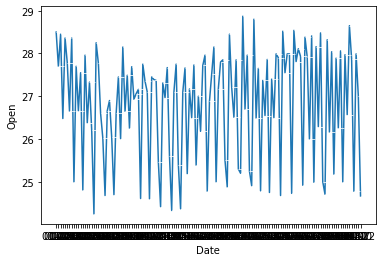

In [12]:
sns.lineplot(x="Date",y="Open",data=year_2019,marker=True)

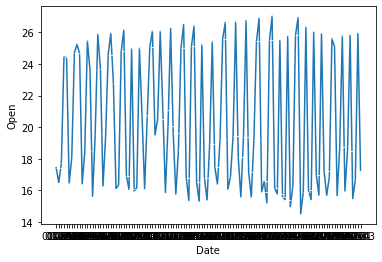

In [13]:
sns.lineplot(x="Date",y="Open",data=year_2020,marker=True)

In [14]:
#As we look closer to each year, we can see that at year 2019, the open price is around from 29 to not lower than 20
#When 2020 is highest is 26 and lowest could be around lower than 14
max_2019_open = year_2019.loc[year_2019['Open'].idxmax()]

In [15]:
#Highest would 28.95$ 2019
min_2019_open = year_2019.loc[year_2019['Open'].idxmin()]

In [16]:
#And lowest is 24.09$ 2019
#Lets look at year 2020
min_2020_open = year_2020.loc[year_2020['Open'].idxmin()]

In [17]:
#lowest is 14.21$ 2019
#highest is  27.29$
max_2020_open = year_2020.loc[year_2020['Open'].idxmax()]

In [18]:
#let's calculate the different between highest and lowest value of daily from 2019 to 2020 to see the change
data["High-Low Diff"] = data["High"] - data["Low"]

In [19]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,High-Low Diff
0,19-06,28.450001,28.719999,28.410000,28.670000,27.796247,4496837,2019,0.309999
1,20-06,28.870001,28.950001,28.610001,28.879999,27.999846,7971328,2019,0.340000
2,21-06,28.799999,28.850000,28.410000,28.540001,27.670210,8435965,2019,0.440000
3,24-06,28.520000,28.719999,28.420000,28.680000,27.805943,2594749,2019,0.299999
4,25-06,28.540001,28.690001,28.360001,28.450001,27.582952,5151976,2019,0.330000


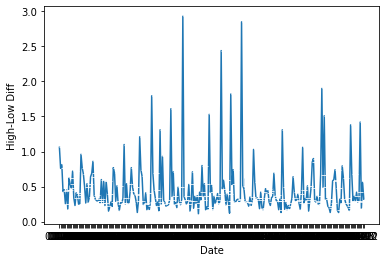

In [20]:
sns.lineplot(x="Date",y="High-Low Diff",data=data,marker=True)

In [21]:
data.loc[data['High-Low Diff'].idxmax()]

Date                13-03
Open                 16.8
High                   19
Low                 16.07
Close                18.8
Adj Close            18.8
Volume           31830455
Year                 2020
High-Low Diff        2.93
Name: 188, dtype: object

In [22]:
#highest different is on 13/03/2020 when it high at 19 and lowest at 16 => 3$ 
data["Open-Close Diff"] = data["Close"] - data["Open"]

In [23]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,High-Low Diff,Open-Close Diff
0,19-06,28.450001,28.719999,28.410000,28.670000,27.796247,4496837,2019,0.309999,0.219999
1,20-06,28.870001,28.950001,28.610001,28.879999,27.999846,7971328,2019,0.340000,0.009998
2,21-06,28.799999,28.850000,28.410000,28.540001,27.670210,8435965,2019,0.440000,-0.259998
3,24-06,28.520000,28.719999,28.420000,28.680000,27.805943,2594749,2019,0.299999,0.160000
4,25-06,28.540001,28.690001,28.360001,28.450001,27.582952,5151976,2019,0.330000,-0.090000


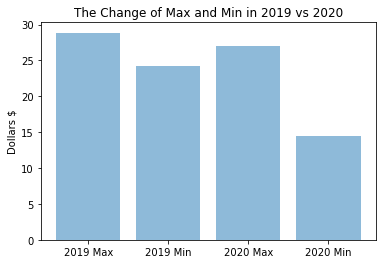

In [24]:
#As we collect the highest Diff => let see how is it affect the volume of buying it
bar_data = ("2019 Max","2019 Min","2020 Max","2020 Min")
y_pos = np.arange(len(bar_data))
performance = [max_2019_open["Open"],min_2019_open["Open"],max_2020_open["Open"],min_2020_open["Open"]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, bar_data)
plt.ylabel('Dollars $')
plt.title('The Change of Max and Min in 2019 vs 2020')

plt.show()


In [29]:
#from the data we can see that the change Max and Min in 2019 is higher than 2020
data_2018 = pd.read_csv("ANZ.AX_2019_2019.csv",sep=",")
data_2018

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-19,27.280001,27.280001,26.860001,26.980000,24.647905,5977320
1,2018-06-20,27.230000,27.719999,27.090000,27.719999,25.323942,7834273
2,2018-06-21,28.020000,28.049999,27.610001,27.850000,25.442707,10838323
3,2018-06-22,28.000000,28.740000,27.889999,28.650000,26.173555,8755923
4,2018-06-25,28.820000,28.940001,28.250000,28.350000,25.899488,7395380
...,...,...,...,...,...,...,...
249,2019-06-13,28.389999,28.500000,28.290001,28.430000,27.563562,2815595
250,2019-06-14,28.350000,28.400000,28.059999,28.219999,27.359961,3248435
251,2019-06-17,28.200001,28.469999,28.020000,28.280001,27.418133,3979476
252,2019-06-18,28.110001,28.480000,28.049999,28.280001,27.418133,7740427


In [ ]:
#let use the currently data to predict the price of close
#I will split the data into 2 set - 80% of 2019 to train and 20% 2019 to test
#Then we will apply that on  2020

In [83]:
data_2019 = year_2019
data_2019

,Date,Open,High,Low,Close,Adj Close,Volume,Year,High-Low Diff,Open-Close Diff
0,19-06,28.450001,28.719999,28.410000,28.670000,27.796247,4496837,2019,0.309999,0.219999
1,20-06,28.870001,28.950001,28.610001,28.879999,27.999846,7971328,2019,0.340000,0.009998
2,21-06,28.799999,28.850000,28.410000,28.540001,27.670210,8435965,2019,0.440000,-0.259998
3,24-06,28.520000,28.719999,28.420000,28.680000,27.805943,2594749,2019,0.299999,0.160000
4,25-06,28.540001,28.690001,28.360001,28.450001,27.582952,5151976,2019,0.330000,-0.090000
...,...,...,...,...,...,...,...,...,...,...
133,23-12,24.680000,24.840000,24.660000,24.730000,24.730000,2454478,2019,0.180000,0.050000
134,24-12,24.730000,24.785000,24.610001,24.730000,24.730000,1830617,2019,0.174999,0.000000
135,27-12,24.709999,24.820000,24.690001,24.780001,24.780001,2296788,2019,0.129999,0.070002
136,30-12,24.780001,24.860001,24.580000,24.799999,24.799999,1897980,2019,0.280001,0.019998


In [49]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.linear_model import LinearRegression

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
from sklearn import preprocessing

In [86]:
#We have some of the data is non-numerical => transform it
le = preprocessing.LabelEncoder()
data_2019["Date"] = le.fit_transform(data_2019["Date"])

<ipython-input-86-38e6e75b425b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019["Date"] = le.fit_transform(data_2019["Date"])


In [88]:
#Before we go deeper , because we are testing Adj Close so we need to test the correlation
data_2019.corr(method ='pearson')

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Diff,Open-Close Diff
Date,1.000000,0.026273,0.019669,0.038208,0.035063,0.076058,-0.061693,-0.223179,0.067316
Open,0.026273,1.000000,0.996586,0.995694,0.991512,0.977946,-0.252374,0.129777,-0.069829
High,0.019669,0.996586,1.000000,0.996702,0.996038,0.981488,-0.250872,0.159453,-0.008896
Low,0.038208,0.995694,0.996702,1.000000,0.997187,0.982845,-0.276491,0.078817,0.006768
Close,0.035063,0.991512,0.996038,0.997187,1.000000,0.985490,-0.284139,0.104881,0.060459
Adj Close,0.076058,0.977946,0.981488,0.982845,0.985490,1.000000,-0.278345,0.100620,0.053284
Volume,-0.061693,-0.252374,-0.250872,-0.276491,-0.284139,-0.278345,1.000000,0.281731,-0.242539
High-Low Diff,-0.223179,0.129777,0.159453,0.078817,0.104881,0.100620,0.281731,1.000000,-0.191628
Open-Close Diff,0.067316,-0.069829,-0.008896,0.006768,0.060459,0.053284,-0.242539,-0.191628,1.000000


In [91]:
x = data_2019.drop(data_2019[["Date","Adj Close","High-Low Diff","Open-Close Diff"]],axis=1)

In [93]:
#Because Adj Close has the lowest corre with Volume, High-Low Diff, Open-Close Diff, Date => drop 4 column
y = data_2019["Adj Close"]

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [95]:
linear = LinearRegression()
linear.fit(x_train,y_train)
print("Coefficent:",linear.coef_)

Coefficent: [ 1.19715440e-01 -2.05446463e-01 -1.17596174e-01  9.49489358e-01
  4.03790004e-09  0.00000000e+00]


In [96]:
print("Intercept:",linear.intercept_)

Intercept: 6.172935991187057


In [107]:
acc_linear = linear.score(x_train,y_train)
y_pred = linear.predict(x_test)

In [108]:
print("Accuracy Score:",acc)

Accuracy Score: 0.9731760716525969


In [106]:
for i in range(len(y_pred)):
    print("Predicted: ",y_pred[i])

Predicted:  27.28766504635074
Predicted:  27.009379239286847
Predicted:  26.912974303233657
Predicted:  24.83581692935299
Predicted:  26.657736872561266
Predicted:  25.856752916129736
Predicted:  26.560495830600363
Predicted:  27.43564212025606
Predicted:  24.5181761958146
Predicted:  26.53480775890516
Predicted:  24.69657048039998
Predicted:  27.06286786345766
Predicted:  25.674299488313206
Predicted:  27.107849600687054
Predicted:  26.780726921311874
Predicted:  24.75049853747136
Predicted:  25.769023993754857
Predicted:  26.598348264389756
Predicted:  27.01334413075644
Predicted:  25.808571827816813
Predicted:  24.77222752419293
Predicted:  26.671605410914484
Predicted:  26.323056154731415
Predicted:  24.98175654005019
Predicted:  25.815601971316692
Predicted:  26.151756549862924
Predicted:  26.11466073249282
Predicted:  27.199845039497156
